# Propagation of Hollow Core waveguide near resonant wavelength

Here we should need to use guided mode.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from slab import SlabExact
from scipy.optimize import newton
plt.style.use('dark_background')
%matplotlib widget

# Setup Waveguide and input fields

In [2]:
loss_min_wl = 5.828070175438596e-06
max_loss_wl = 6.90764472e-06
near_resonance_wl = .998*6.90764472e-06

In [3]:
A = SlabExact(scale=1e-5, Ts=[15, 1, 8, 1, 15],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[100, 40, 300, 40, 100],
              symmetric=True, wl=near_resonance_wl)

In [4]:
b = 1.25
a = 1/ b**2
def quadratic_piecewise(x):
    conds = [(x<-b), ((-b<=x)*(x<=b)), (x>b)]
    funcs = [0, lambda x: 1 - a * x**2, 0]
    return np.piecewise(x, conds, funcs)
    
def modified_dist(x):
    return (x-1/4) * np.exp(-(x-1/2)**2)  

def odd_modified_dist(x):
    return x * np.exp(-x**2)
    
def normal_dist(x):
    return np.exp(-x**2)

In [5]:
# Set input function
f0 = quadratic_piecewise

# Set input field type
field_type = 'TE'

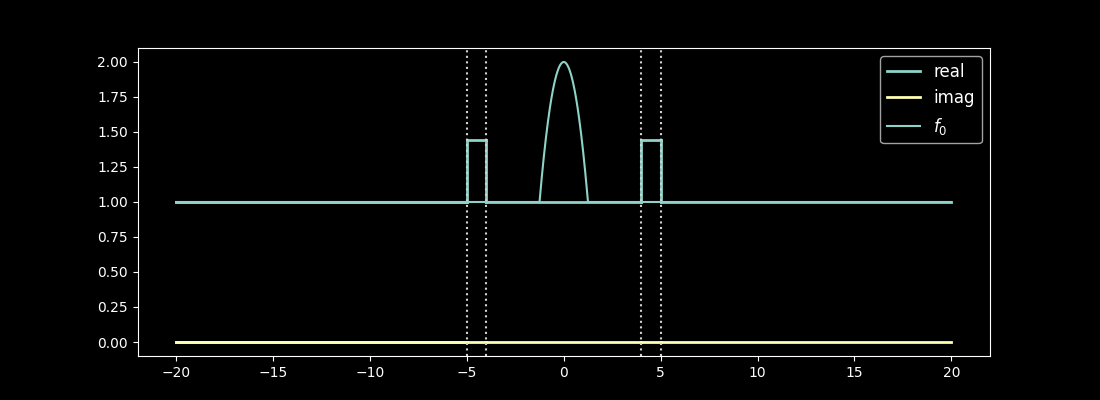

In [6]:
A.plot_refractive_index(color='cornflowerblue', linewidth=2);
A.add_1d_plot(lambda x: f0(x) + 1, label='$f_0$')

# Guided Portion

Based on info below, we found the actual guided mode near K_low

In [7]:
mode_type = 'guided'
k_low = A.K_low

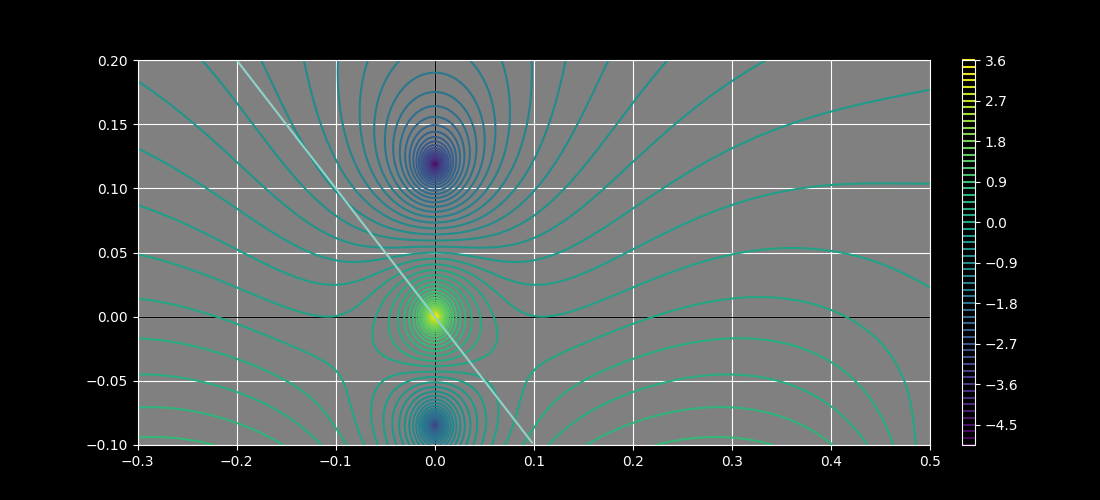

In [8]:
A.determinant_plot(-.3, .5, -.1, .2);

In [9]:
Z = newton(A.determinant, np.array(.11j), tol=1e-13)
plt.plot(Z.real, Z.imag, marker='o')
Beta = A.Beta_from_Zi(Z, A.n0)
Psi = np.arcsin(Z / (A.K0 * A.n0))

In [10]:
Fs1 = A.fields(Beta, plane='Beta', mode_type='guided')


(-0.8, 0.8)

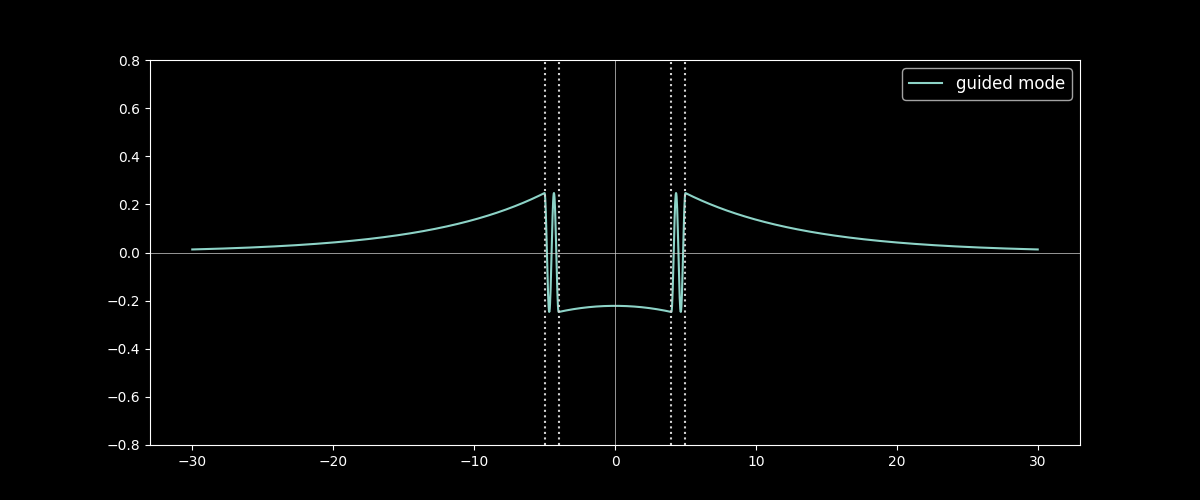

In [12]:
A.plot_field_1d(Fs1, xs=np.linspace(-30,30,3000), label='guided mode', part='real');
plt.gca().set_ylim(-.8, .8)

## Get coefficient of guided mode


In [13]:
from scipy.integrate import quad
integrand = lambda x: Fs1(x) * Fs1(x)
cf1 = quad(integrand, -50,50, complex_func=True)[0]
cf1

(0.9999882776701964-8.713823653352557e-15j)

In [19]:
integrand = lambda x: f0(x) * Fs1(x)
cf2 = quad(integrand, -b, b, complex_func=True)[0].real
cf2

-0.370354834536892

In [20]:
alpha = cf2
alpha

-0.370354834536892

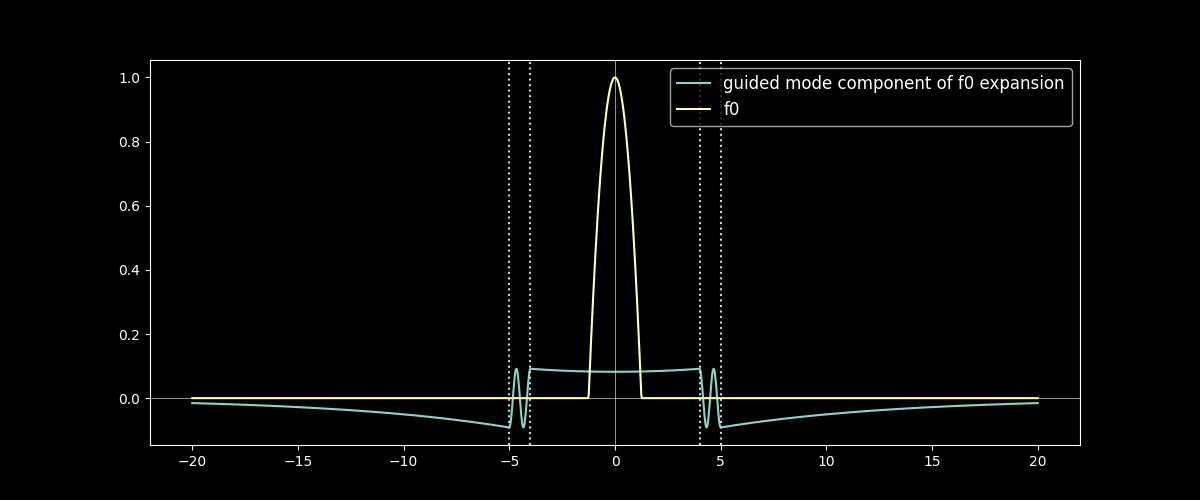

In [22]:
A.plot_field_1d(lambda x: alpha * Fs1(x), label='guided mode component of f0 expansion');
A.add_1d_plot(f0, label='f0')

When close to but below resonant input wavelength (so slightly higher than resonant frequency), the guided mode with significant core overlap has no longer been cutoff and participates in expansion of input field. Above plot shows guided component for this $f_0$ at this near resonant frequency.

# Propagate Radiation Field

In [23]:
Propagator_Class = A.propagator()


### Propagating Portion

This part takes a lot of resolution in this case

#### Spike 1

In [24]:
# P_prop1 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=0.005, RZ=.385, NZ=100, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop1 = Propagator_Class(A.real_contour(0.0001, .385, 100), f0=f0, Lx=-b, Rx=b)

In [25]:
P_prop1_5 = Propagator_Class(A.real_contour(.385, .42, 20), f0=f0, Lx=-b, Rx=b)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

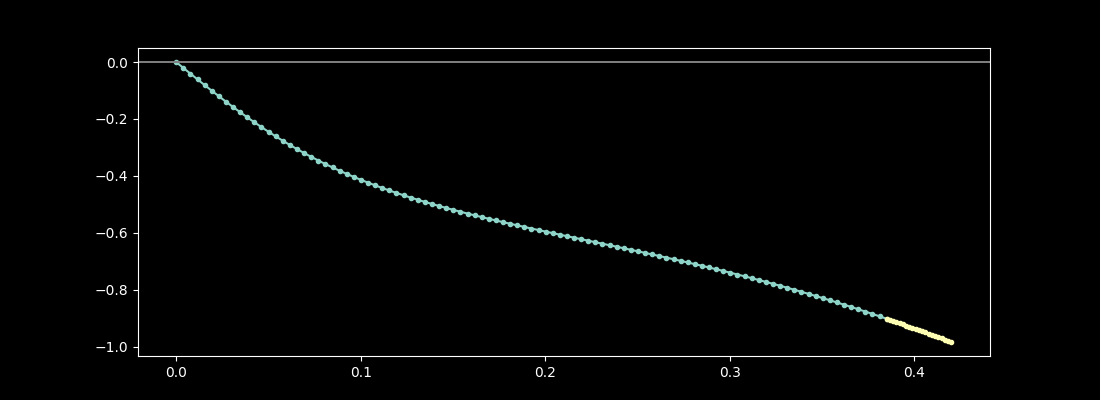

In [26]:
P_prop1.plot_transform()
P_prop1_5.plot_transform(ax=plt.gca())


#### Spike 2

In [27]:
# P_prop2 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=.42, RZ=1.14, NZ=120, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop2 = Propagator_Class(A.real_contour(.42, 1.14, 120), f0=f0, Lx=-b, Rx=b)

In [28]:
# P_prop2_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=1.14, RZ=1.3, NZ=30, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop2_5 = Propagator_Class(A.real_contour(1.14, 1.3, 30), f0=f0, Lx=-b, Rx=b)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

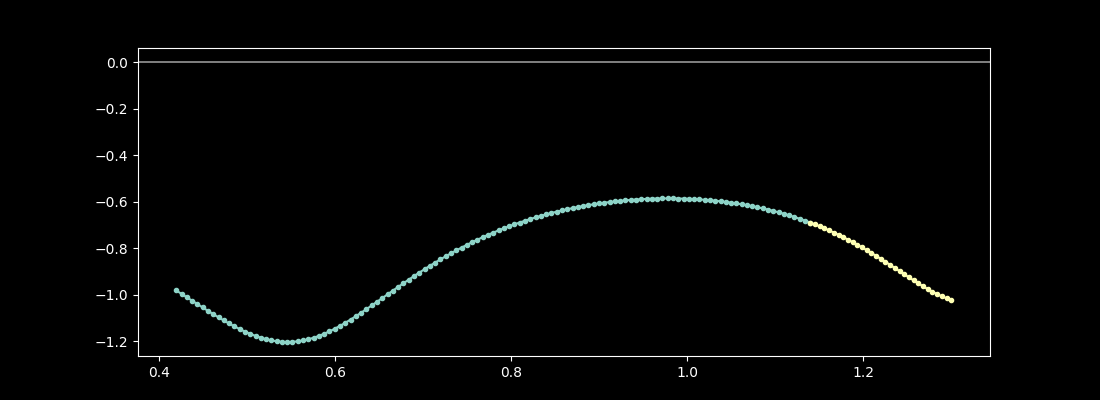

In [29]:
plt.close('all')
P_prop2.plot_transform()
P_prop2_5.plot_transform(ax=plt.gca())


#### Spike 3

In [30]:
# P_prop3 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=1.3, RZ=1.85, NZ=60, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop3 = Propagator_Class(A.real_contour(1.3, 1.85, 60), f0=f0, Lx=-b, Rx=b)

In [31]:
# P_prop3_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=1.85, RZ=2.05, NZ=20, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop3_5 = Propagator_Class(A.real_contour(1.85, 2.05, 20), f0=f0, Lx=-b, Rx=b)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

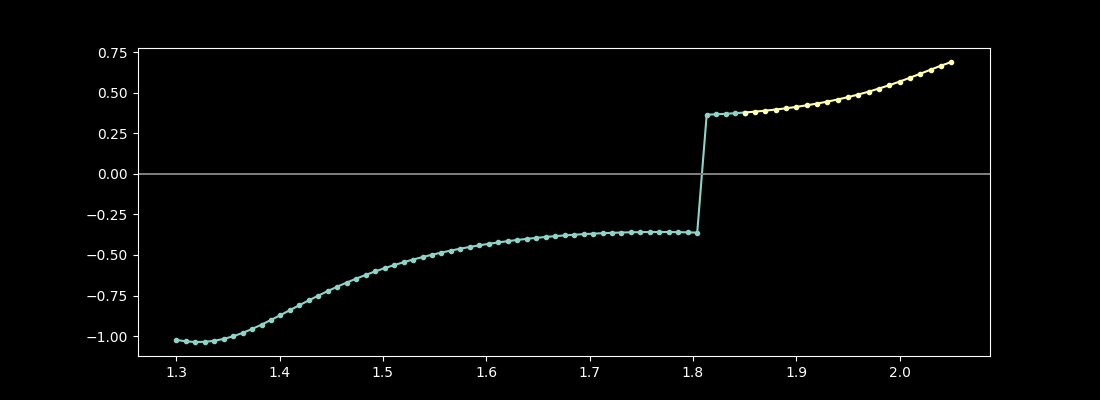

In [32]:
plt.close('all')
P_prop3.plot_transform()
P_prop3_5.plot_transform(ax=plt.gca())

#### Spike 4

In [33]:
# P_prop4 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=2.05, RZ=2.65, NZ=90, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop4 = Propagator_Class(A.real_contour(2.05, 2.65, 90), f0=f0, Lx=-b, Rx=b)

In [34]:
# P_prop4_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=2.65, RZ=2.8, NZ=20, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop4_5 = Propagator_Class(A.real_contour(2.65, 2.8, 40), f0=f0, Lx=-b, Rx=b)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

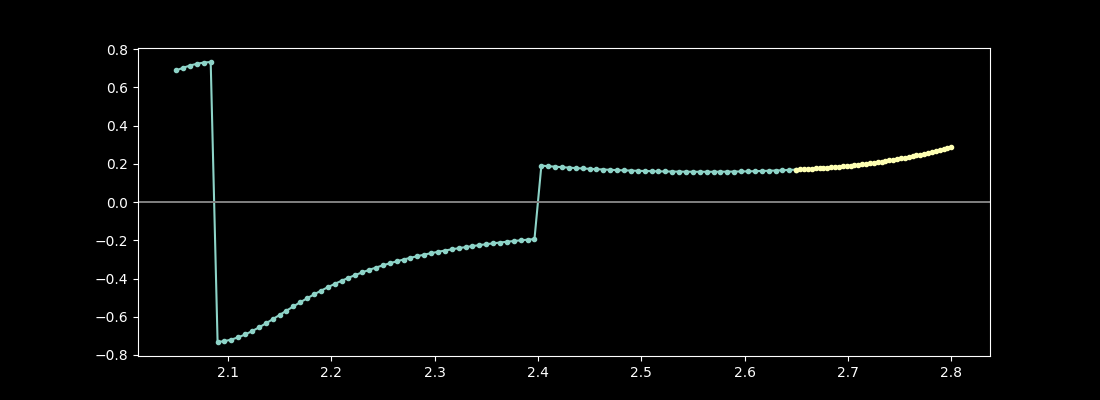

In [37]:
plt.close('all')
P_prop4.plot_transform()
P_prop4_5.plot_transform(ax=plt.gca())

#### Spike 5

In [38]:
# P_prop5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=2.8, RZ=3., NZ=60, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop5 = Propagator_Class(A.real_contour(2.8, 3., 60), f0=f0, Lx=-b, Rx=b)

In [39]:
# P_prop5_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=3., RZ=3.52, NZ=60, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop5_5 = Propagator_Class(A.real_contour(3., 3.52, 60), f0=f0, Lx=-b, Rx=b)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

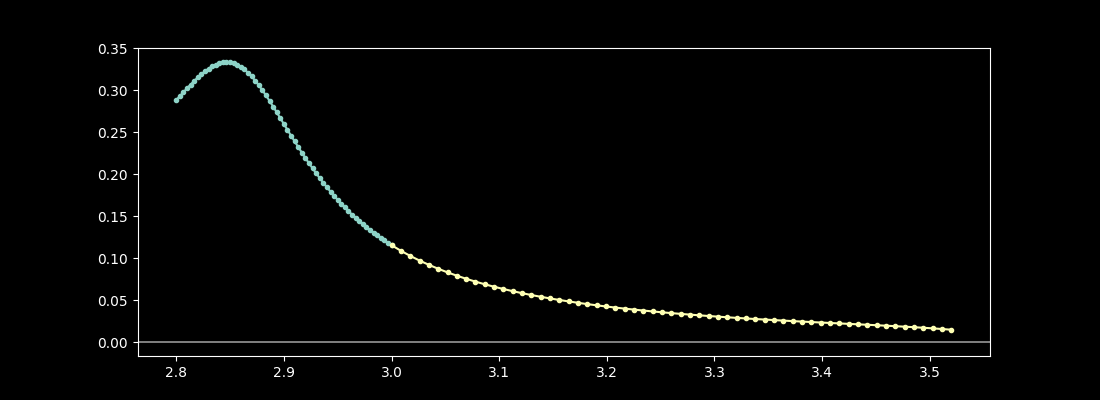

In [40]:
plt.close('all')
P_prop5.plot_transform()
P_prop5_5.plot_transform(ax=plt.gca())

#### Spike 6 and rest of propagating portion

In [41]:
# P_prop6 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=3.52, RZ=4.5, NZ=100, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop6 = Propagator_Class(A.real_contour(3.52, 4.5, 100), f0=f0, Lx=-b, Rx=b)

In [42]:
# P_prop7 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=4.5, RZ=A.Z_evanescent.real, NZ=200, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop7 = Propagator_Class(A.real_contour(4.5, A.Z_evanescent.real, 200), f0=f0, Lx=-b, Rx=b)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

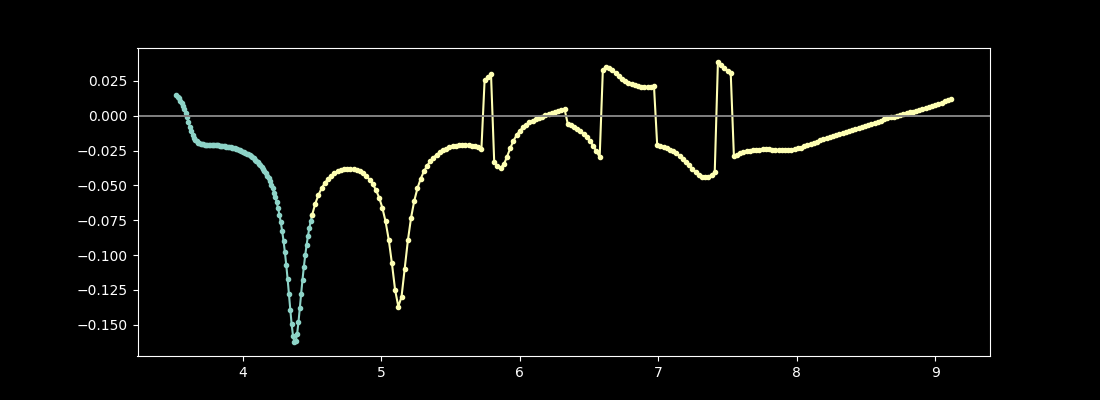

In [43]:
plt.close('all')
P_prop6.plot_transform()
P_prop7.plot_transform(ax=plt.gca())

### Evanescent Portion

In [44]:
# P_ev = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=A.Z_evanescent.real, RZ=14, NZ=100, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_ev1 = Propagator_Class(A.real_contour(A.Z_evanescent.real, 14, 100), f0=f0, Lx=-b, Rx=b)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

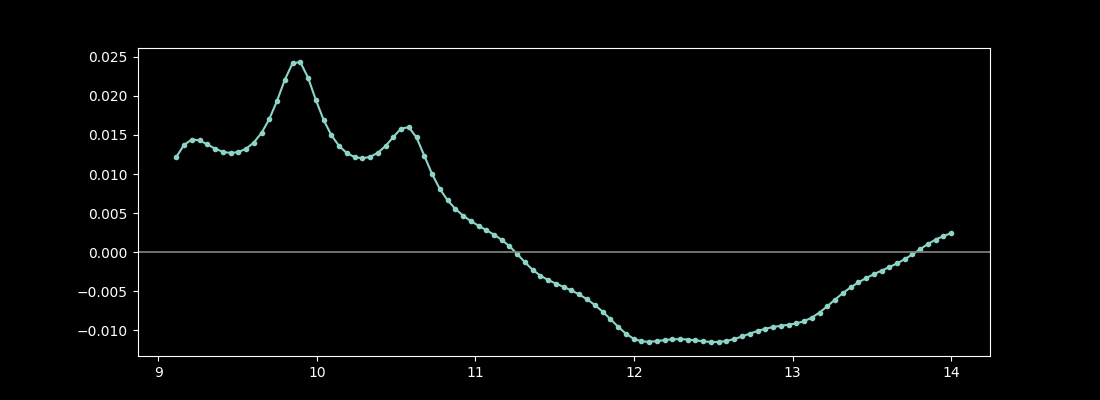

In [48]:
plt.close('all')
P_ev1.plot_transform()

In [50]:
# P_ev2 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=14, RZ=2*A.Z_evanescent.real, NZ=100, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_ev2 = Propagator_Class(A.real_contour(14, 2*A.Z_evanescent.real, 100), f0=f0, Lx=-b, Rx=b)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

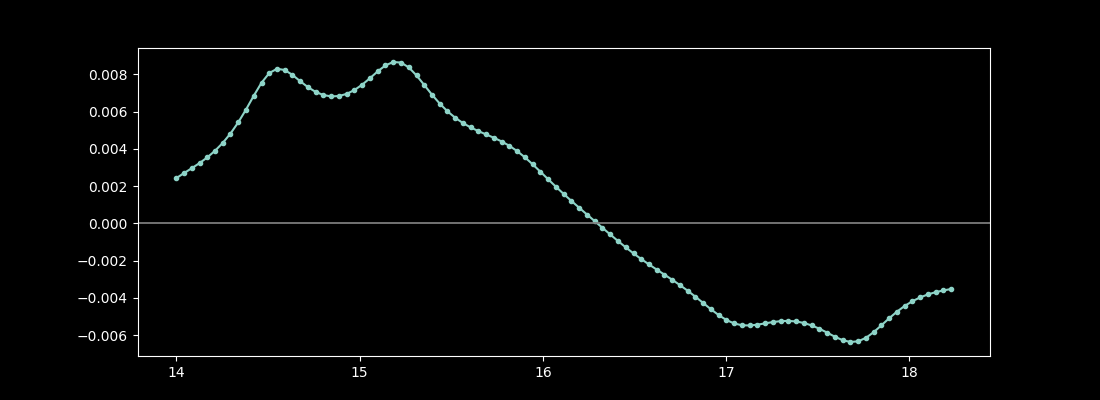

In [51]:
plt.close('all')
P_ev2.plot_transform()

# Cross sections at input


In [52]:
propfuncs = [ P_prop1, 
             P_prop1_5, 
             P_prop2, 
             P_prop2_5, 
             P_prop3, 
             P_prop3_5, 
             P_prop4, 
             P_prop4_5, 
             P_prop5, 
             P_prop5_5, 
             P_prop6, 
             P_prop7,
            ]
evfuncs = [P_ev1, 
           P_ev2]

In [53]:
guided = lambda x: alpha * Fs1(x)
prop = lambda x: sum([f.slice_propagate(x) for f in propfuncs])
ev = lambda x: sum([f.slice_propagate(x) for f in evfuncs]) 
rad = lambda x: prop(x) + ev(x)
full = lambda x: rad(x) + guided(x)

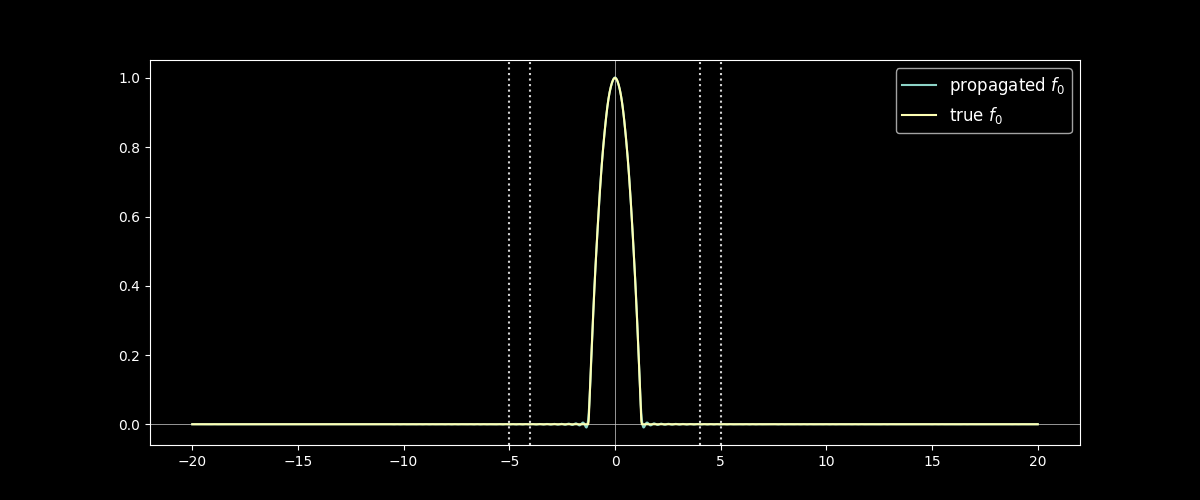

In [54]:
A.plot_field_1d(full, label='propagated $f_0$') 
A.add_1d_plot(f0, label='true $f_0$')
# plt.gca().set_xlim(-3,3)

# 2D Filled Contour Plots

In [55]:
Guided = lambda x, z: alpha * Fs1(x, zs=z)
Prop = lambda x, z, method='simpsons': sum([f.propagate(x, zs=z, method=method) for f in propfuncs])
Ev = lambda x, z, method='simpsons': sum([f.propagate(x, zs=z, method=method) for f in evfuncs]) 
Rad = lambda x, z, method='simpsons': Prop(x, z, method=method) + Ev(x, z, method=method)
Full = lambda x, z, method='simpsons': Guided(x, z) + Rad(x, z, method=method)

In [56]:
# Setting Xs, useful to differentiate resolution between regions
B= SlabExact(scale=1e-5, Ts=[10, 1, 8, 1, 10],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[30, 8, 30, 8, 30],
              symmetric=True, wl=max_loss_wl)

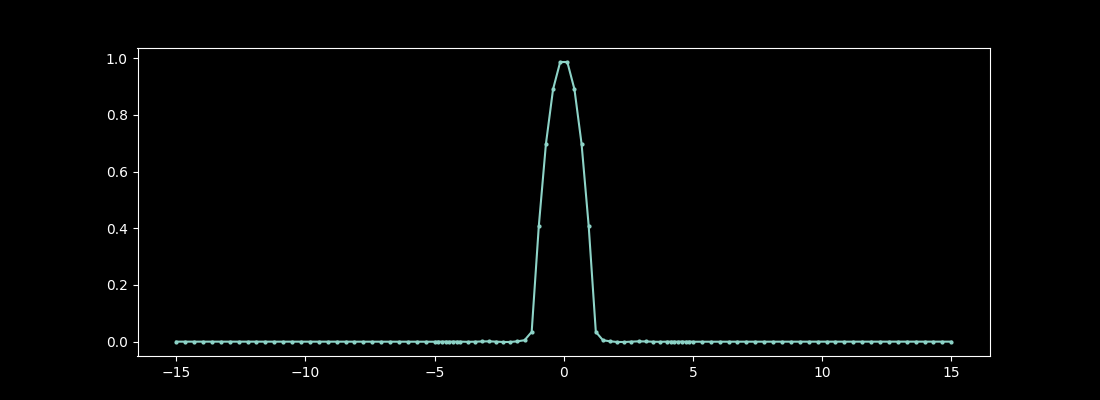

In [57]:
plt.close('all')
fig = plt.figure(1, figsize=(11,4))
plt.plot(B.all_Xs, full(B.all_Xs).real, marker='o', markersize=2);

In [58]:
# # Good ratio for z is 40 points per 2 units (so 20 points per unit)
# zmin, zmax=0, 60
# A.plot_field_2d(Full, xs=B.all_Xs, zmin=zmin,
#                 # colorbar=False,
#                 zmax=zmax, zref=int((zmax-zmin)*20),
#                 equal=True,
#                );

# Surface Plot

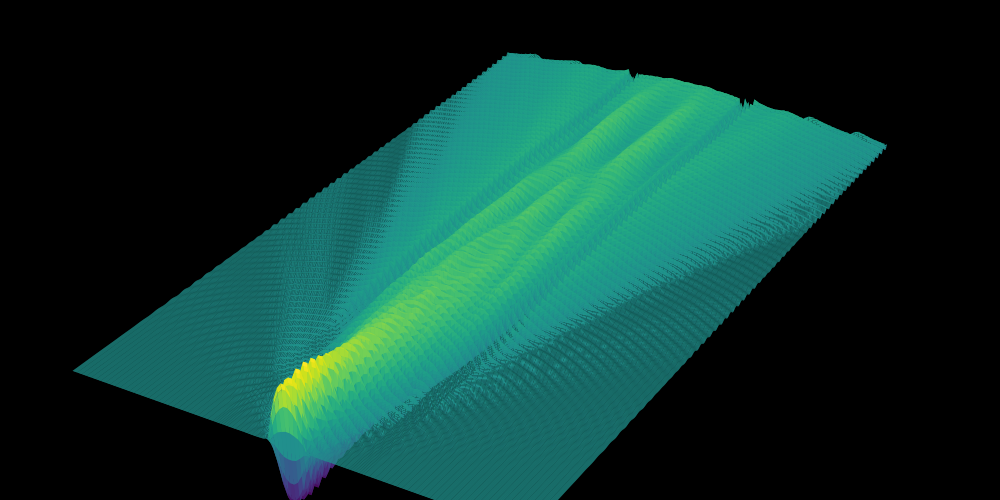

In [59]:
zmin, zmax=0, 50
A.plot_field_2d_surface(Full, xs=B.all_Xs, colorbar=False, zoom=3,
                azim=-60, elev=30, zmin=zmin,
                zmax=zmax, zref=int(zmax*20),
                rstride=1, cstride=1,
               );

# Leaky mode representation via contour integration


(<Figure size 1100x500 with 2 Axes>, <Axes: >)

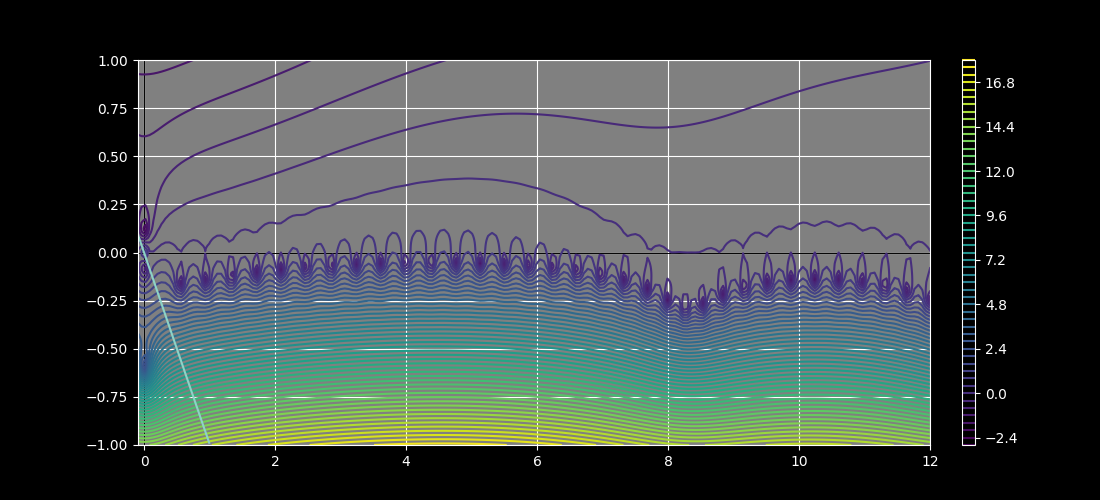

In [78]:
A.determinant_plot( -.1, 12,  -1,1,iref=200, rref=200, levels=60)


In [79]:
z_guesses = np.array([
    # .6j,
    -.65 + .2j, 
    -1.3 + .13j,
    -2.1 + .1j, 
    -2.9 + .85j, 
    -3.6 + .7j,
    -4.4 + .7j,
    -5.17 + .06j,
    -5.85 + .07j,
    -6.7 + .09j,
    -7.35 + .14j,
    -8. + .2j, 
    -8.5 + .28j, 
    -9.2 + .18j,
])

for z in z_guesses:
    Zs = np.array([newton(A.determinant, z, tol=1e-13) for z in -z_guesses])

for Z in Zs:
    plt.plot(Z.real, Z.imag, marker='o')

In [80]:
# A.plot_field_1d(A.fields(Zs[1]),  label='particular leaky mode');

## Construct field

In [127]:
P_leaky = []

# for Z in Zs[:]:
    
#     PZe = Propagator_Class(A.circular_contour(Z, 1e-6, 5, orientation='cw'),
#                            f0=f0, Lx=-b, Rx=b)
#     P_leaky.append(PZe)
    
    # PZo = Propagator_Class(f0=f0, Lx=-.5, Rx=.5,
    #                       LZ=100, RZ=150, NZ=10,
    #                       field_type=field_type,
    #                       sign='-1', circ_contour=circ_contour,
    #                       paper_method=paper_method)
    # P_leaky.append(PZo)
F_leakys = [A.fields(Z) for Z in Zs]
alphas = np.array([quad(lambda x: F(x) * f0(x), -b, b, complex_func=True)[0] for F in F_leakys])


In [136]:
leaky = lambda x: sum([alpha * F(x) for (alpha, F) in zip(alphas, F_leakys)])
Leaky = lambda x, z: sum([alpha * F(x, z) for (alpha, F) in zip(alphas, F_leakys)])

leaky_guided = lambda x: leaky(x) + alpha * Fs1(x)
Leaky_guided = lambda x, z: Leaky(x, z)+ alpha * Fs1(x, zs=z)

diff_leaky_guided_full = lambda x: leaky_guided(x) - full(x)
Diff_Leaky_guided_Full = lambda x, z: Leaky_guided(x,z) - Full(x,z, method='simpsons')

## Leaky field profile at input

In [129]:
# Setting Xs, useful to differentiate resolution between regions
C = SlabExact(scale=1e-5, Ts=[2, 1, 8, 1, 2],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[40, 30, 110, 30, 40],
              symmetric=True, wl=max_loss_wl)

In [130]:
# plt.close('all')
# fig = plt.figure(1, figsize=(11,4))
# plt.plot(C.all_Xs, prop(C.all_Xs).real, marker='o', markersize=2);

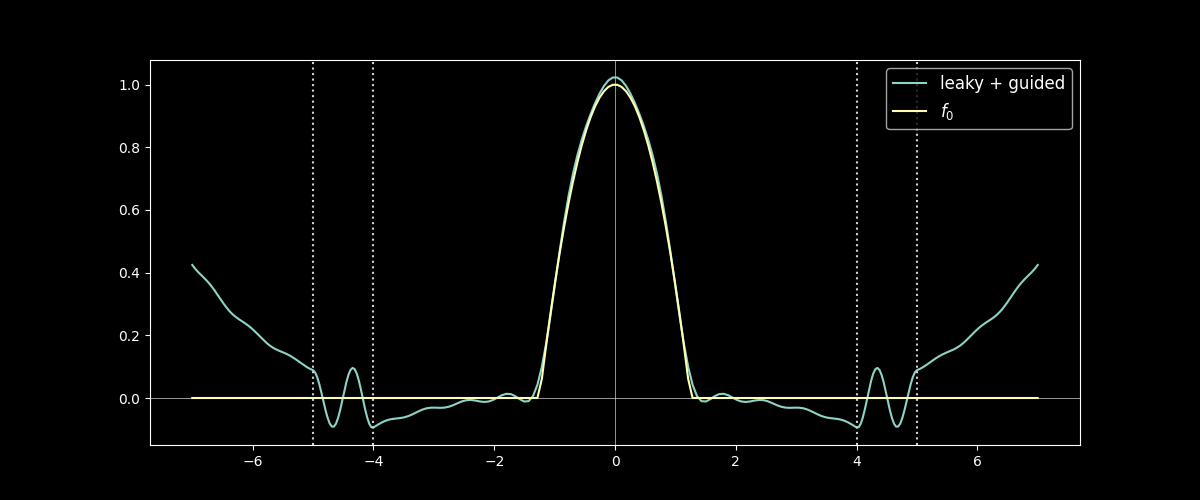

In [131]:
A.plot_field_1d(leaky_guided, xs=C.all_Xs, label='leaky + guided')
A.add_1d_plot(f0, xs=C.all_Xs, label='$f_0$')

## 2D overhead plot of leaky mode field approximation

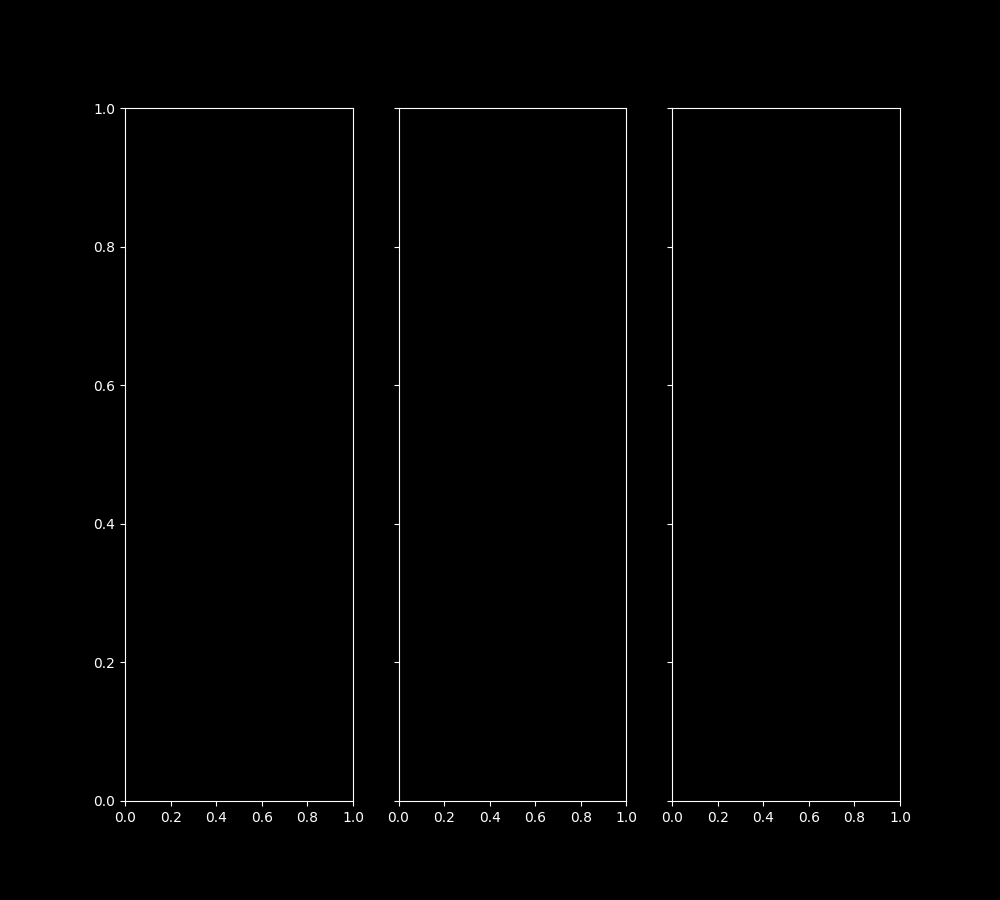

In [132]:
plt.close('all')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(10,9))

zmin = 0
zmax = 60
zref = int((zmax-zmin)*40/2)
zs = np.linspace(zmin, zmax, zref)


In [133]:
A.add_2d_plot(Full, ax=ax1, xs=C.all_Xs, zs=zs, plot_Rhos=True, colorbar=True,);
ax1.set_title('True Field')

Text(0.5, 1.0, 'True Field')

In [134]:
A.add_2d_plot(Leaky_guided, ax=ax2, xs=C.all_Xs, zs=zs, plot_Rhos=True, colorbar=True);
ax2.set_title('Leaky + Guided Field')

Text(0.5, 1.0, 'Leaky + Guided Field')

In [137]:
A.add_2d_plot(Diff_Leaky_guided_Full, ax=ax3, xs=C.all_Xs, zs=zs, part='norm', plot_Rhos=True, colorbar=True);
ax3.set_title('Norm of Difference')

Text(0.5, 1.0, 'Norm of Difference')

## Asymptotics (slice along z-axis at x=0)

In [138]:
x0 = 0

guided_z = lambda z, x0=x0: alpha * Fs1(x0, zs=z)[:, 0]
prop_z = lambda z, x0=x0, method='simpsons': sum([f.slice_propagate(z, x0, 'x', method=method) for f in propfuncs]) 
ev_z = lambda z, x0=x0, method='simpsons': sum([f.slice_propagate(z, x0, 'x', method=method) for f in evfuncs]) 

rad_z = lambda z, x0=x0, method='simpsons': prop_z(z, x0, method) + ev_z(z, x0, method)
full_z = lambda z, x0=x0, method='simpsons': rad_z(z, x0, method) + guided_z(z, x0)

leaky_z = lambda z, x0=x0, method='simpsons': sum([P.slice_propagate(z, x0, 'x', method=method) for P in P_leaky]) 
leaky_guided_z = lambda z, x0=x0, method='simpsons': leaky_z(z, x0, method) + guided_z(z, x0=x0)


Text(0.5, 1.0, 'Full Propagated Field versus combined Leaky and Guided Mode Fields\nCross section in direction of propagation at $x=0.00$')

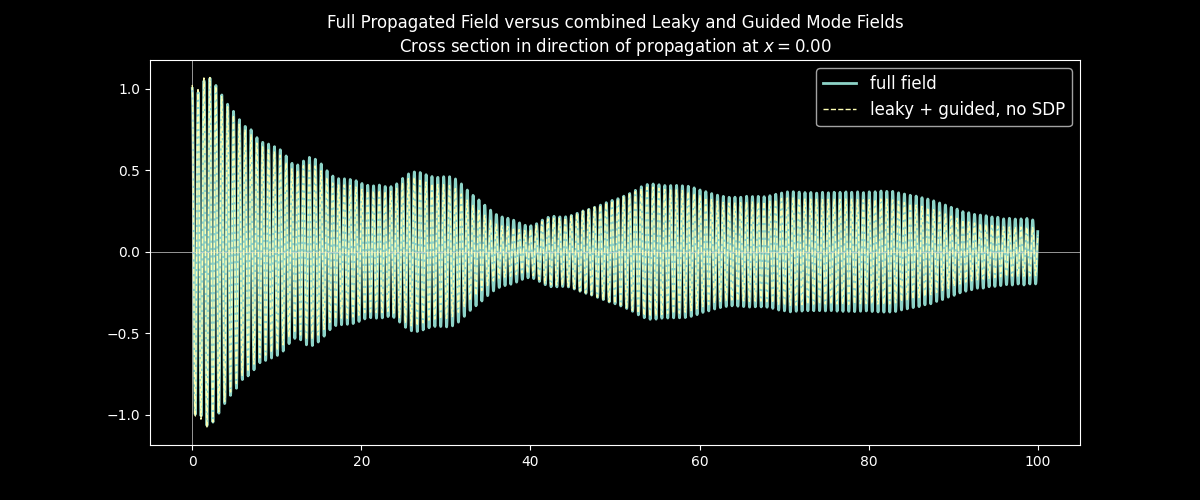

In [139]:
part = 'real'
zmin, zmax = 0,100
zref=int((zmax-zmin)*40)
zs = np.linspace(zmin, zmax, zref)

A.plot_field_1d(full_z, xs=zs, part=part, plot_Rhos=False, linewidth=2, label='full field');
A.add_1d_plot(leaky_guided_z, xs=zs, part=part, linewidth=1, linestyle='--', label='leaky + guided, no SDP');
# A.add_1d_plot(ratio, xs=zs, part=part, linewidth=1, linestyle='--', label='ratio');
plt.title('Full Propagated Field versus combined Leaky and Guided Mode Fields\n\
Cross section in direction of propagation at $x=%.2f$'%x0)

Text(0.5, 1.0, 'Radiation Field versus Leaky Mode Field\nCross section in direction of propagation at $x=0.00$')

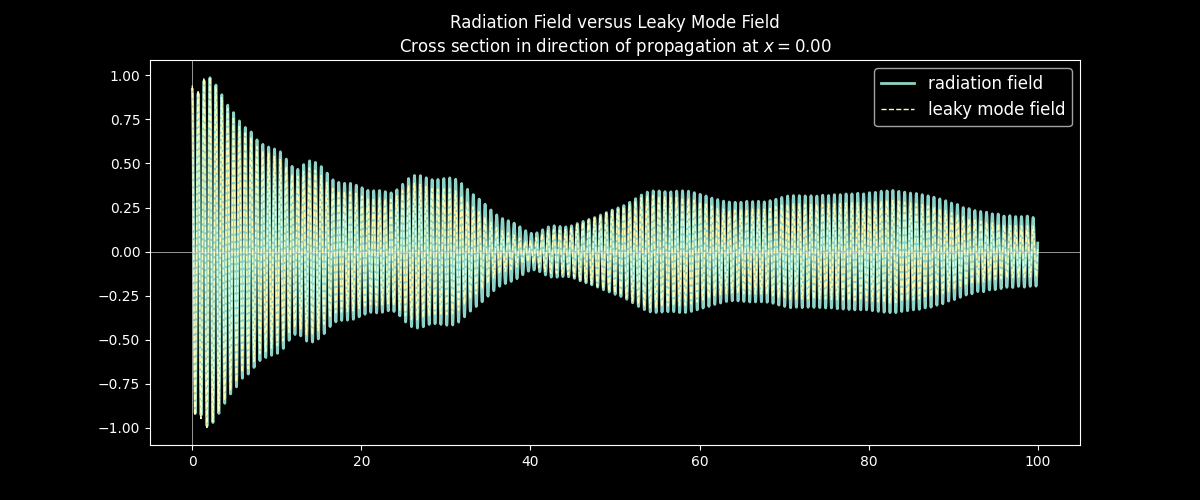

In [140]:
part = 'real'
zmin, zmax = 0,100
zref=int((zmax-zmin)*40)
zs = np.linspace(zmin, zmax, zref)

A.plot_field_1d(rad_z, xs=zs, part=part, plot_Rhos=False, linewidth=2, label='radiation field');
A.add_1d_plot(leaky_z, xs=zs, part=part, linewidth=1, linestyle='--', label='leaky mode field');
# A.add_1d_plot(ratio, xs=zs, part=part, linewidth=1, linestyle='--', label='ratio');
plt.title('Radiation Field versus Leaky Mode Field\n\
Cross section in direction of propagation at $x=%.2f$'%x0)

# Integral along Steepest Descent Path in Z plane

Here we examine the remaining portion of the expansion, namely the integral along the steepest descent path (SDP).

The SDP is found by keeping the imaginary part of $\beta(Z) = i \sqrt{k_0^2n_0^2 - Z^2}$ constant at $\text{Im}(\beta(0)) = k_0 n_0$.  Using $Z = x + y i$ we calculate from the complex square root formula that 

$$ y = \pm \frac{k_0 n_0 x}{\sqrt{k_0^2n_0^2 + x^2}}$$

along this path. Below we plot this over the determinant function.

(<Figure size 1100x500 with 2 Axes>, <Axes: >)

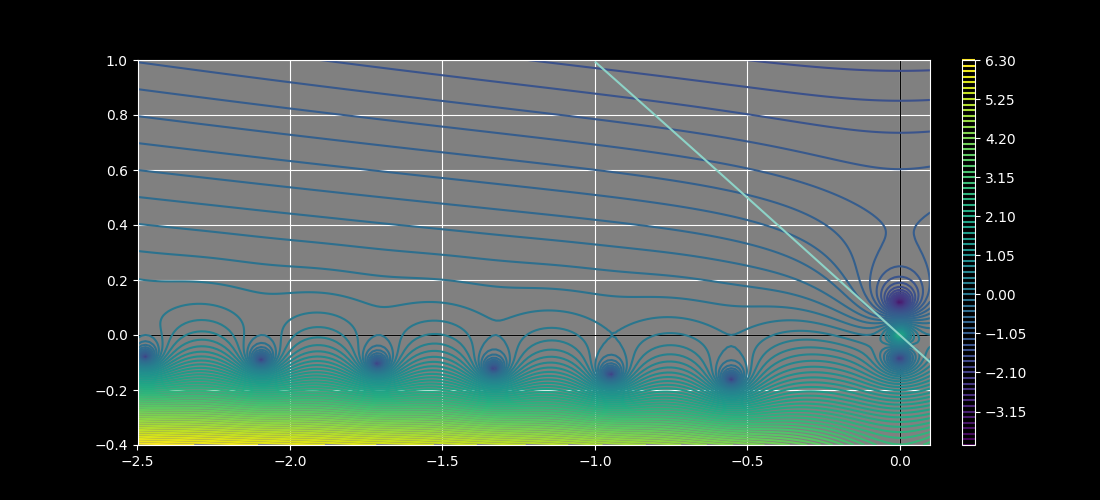

In [141]:
A.determinant_plot(-2.5, .1, -.4, 1)

## Propagate along SDP

We're building in the capabilities to do this

In [142]:
Propagator_Class = A.propagator()

In [143]:
P_sdp1 = Propagator_Class(A.sdp_contour(-.01, -.1, 80), f0=f0, Lx=-b, Rx=b)
P_sdp2 = Propagator_Class(A.sdp_contour(-.1, -.75, 130), f0=f0, Lx=-b, Rx=b)
P_sdp3 = Propagator_Class(A.sdp_contour(-.75, -2.5, 160), f0=f0, Lx=-b, Rx=b)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

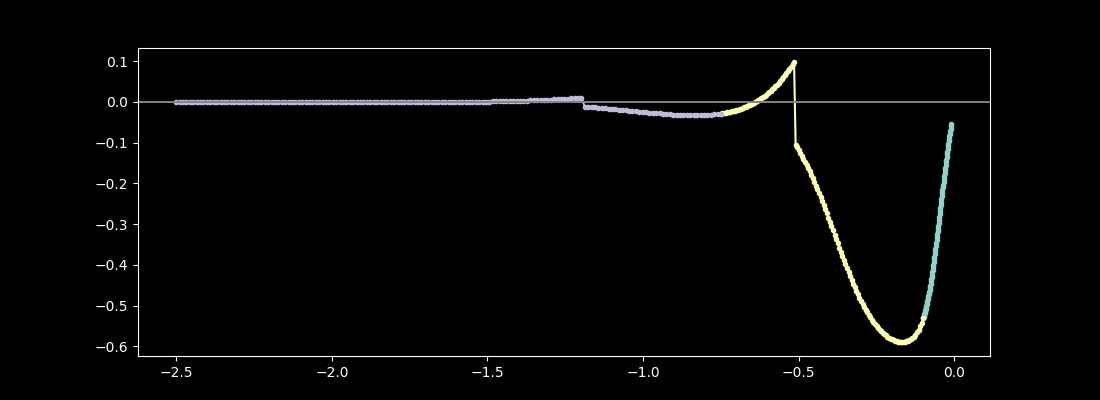

In [144]:
P_sdp1.plot_transform()
P_sdp2.plot_transform(ax=plt.gca())
P_sdp3.plot_transform(ax=plt.gca())

In [145]:
sdp_funcs = [
    P_sdp1,
    P_sdp2,
    P_sdp3,
]

In [146]:
x0 = 0

sdp = lambda x: sum([f.slice_propagate(x,0) for f in sdp_funcs])
sdp_z = lambda z, x0=x0, method='simpsons': sum([f.slice_propagate(z, x0, 'x', method=method) for f in sdp_funcs])

Sdp = lambda x, z, method='simpsons': sum([f.propagate(x, z, method=method) for f in sdp_funcs])

In [147]:
# A.plot_field_1d(sdp, xs=np.linspace(-10,10,1000), part='real', label='SDP_contribution')

In [148]:
# A.plot_field_1d(sdp_z, xs=np.linspace(0,40,1400), plot_Rhos=False)

In [149]:
# A.plot_field_2d(Sdp, xs=np.linspace(-9,9,1000), zmax=15, zref=15*30)

In [150]:
# A.plot_field_2d_surface(P_sdp1.propagate, xs=np.linspace(0, 8, 100), zmax=5, zref=150, cstride=1, rstride=1,
#                        colorbar=False)

## Leaky field profile at input

In [159]:
leaky_sdp = lambda x : leaky(x) - sdp(x)
leaky_guided_sdp = lambda x : leaky_sdp(x) + guided(x)

Leaky_sdp = lambda x, z, method='simpsons': Leaky(x,z, method=method) - Sdp(x,z, method=method)
Leaky_guided_sdp = lambda x, z, method='simpsons': Leaky_guided(x,z) - Sdp(x,z, method=method)

diff_leaky_guided_sdp_full = lambda x: leaky_guided_sdp(x) - full(x)
Diff_Leaky_guided_sdp_full = lambda x,z : Leaky_guided_sdp(x,z) - Full(x,z)

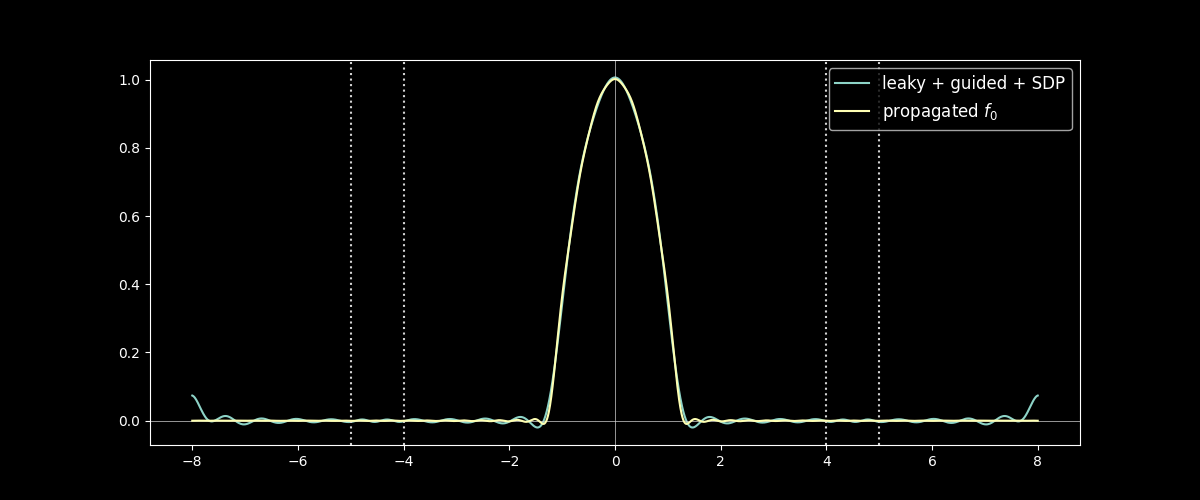

In [160]:
A.plot_field_1d(leaky_guided_sdp, xs=np.linspace(-8,8, 2000), label='leaky + guided + SDP')
A.add_1d_plot(full, xs=np.linspace(-8,8, 2000), label='propagated $f_0$')
# A.add_1d_plot(f0, xs=np.linspace(-8,8, 2000), linewidth=.5, label='true $f_0$')

## 2D overhead plot of leaky mode field approximation

In [161]:
# Setting Xs, useful to differentiate resolution between regions
C = SlabExact(scale=1e-5, Ts=[2, 1, 8, 1, 2],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[10, 8, 60, 8, 10],
              symmetric=True, wl=max_loss_wl)

In [162]:
# xs = C.all_Xs

In [163]:
# plt.close('all')
# fig = plt.figure(1, figsize=(11,4))
# plt.plot(xs, full(xs).real, marker='o', markersize=2);

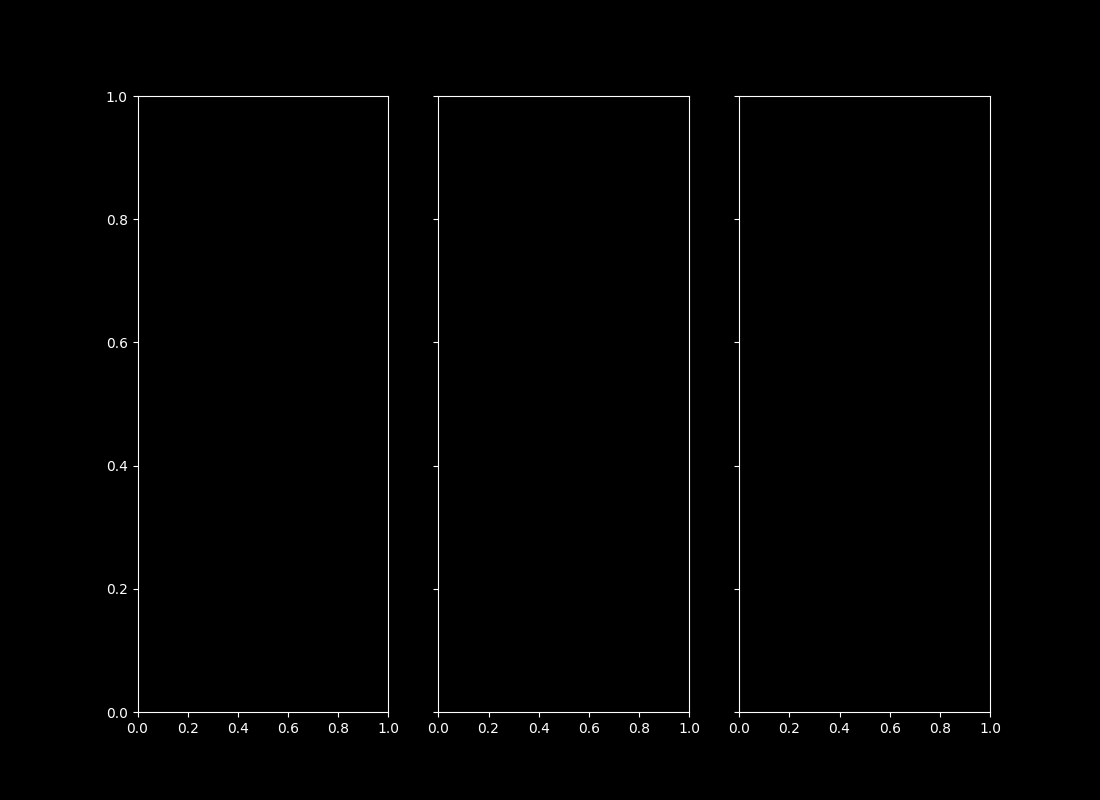

In [164]:
plt.close('all')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(11,8))

xs = C.all_Xs

zmin = 0
zmax = 60
zref = int((zmax-zmin)*40/2)
zs = np.linspace(zmin, zmax, zref)

In [165]:
A.add_2d_plot(Full, ax=ax1, xs=xs, zs=zs, plot_Rhos=True, colorbar=True);
ax1.set_title('True Field')

Text(0.5, 1.0, 'True Field')

In [166]:
A.add_2d_plot(Leaky_guided_sdp, ax=ax2, xs=xs, zs=zs, plot_Rhos=True, colorbar=True);
ax2.set_title('Leaky + Guided Mode Fields with SDP')

Text(0.5, 1.0, 'Leaky + Guided Mode Fields with SDP')

In [167]:
A.add_2d_plot(Diff_Leaky_guided_sdp_full, ax=ax3, xs=xs, zs=zs, part='norm', colorbar_format='%.1e', colorbar_nticks=4,
              plot_Rhos=True, colorbar=True);
ax3.set_title('Norm of Difference')

Text(0.5, 1.0, 'Norm of Difference')

## Asymptotics (slice along z-axis at x=0)

In [168]:
x0 = 0

leaky_sdp_z = lambda z, x0=x0, method='simpsons': leaky_z(z, x0, method) - sdp_z(z, x0, method)
leaky_guided_sdp_z = lambda z, x0=x0, method='simpsons': leaky_guided_z(z, x0=x0, method=method) - sdp_z(z, x0, method)


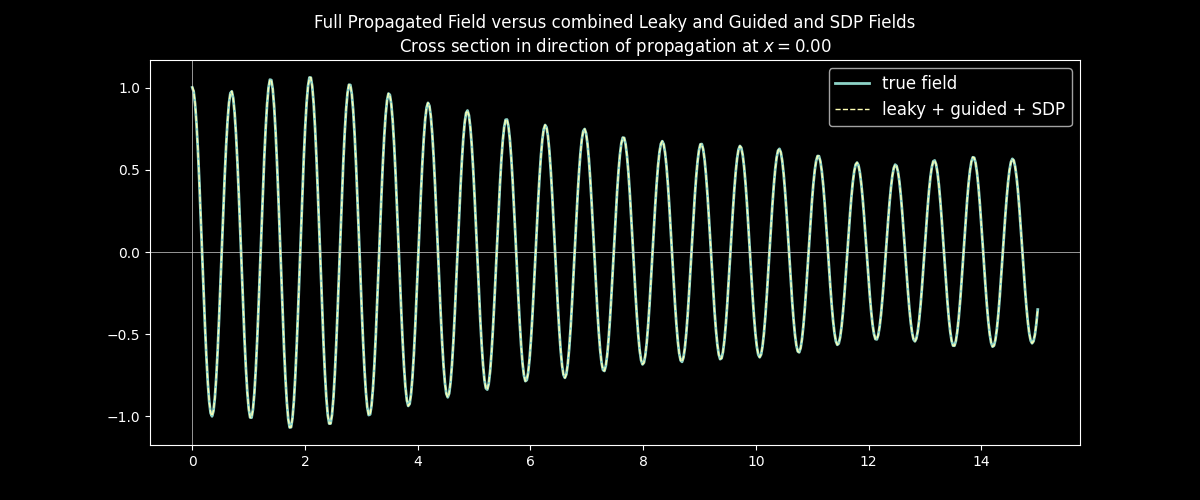

In [169]:
part = 'real'
zmin, zmax = 0,15
zref=int((zmax-zmin)*40)
zs = np.linspace(zmin, zmax, zref)

A.plot_field_1d(full_z, xs=zs, part=part, plot_Rhos=False, linewidth=2, label='true field');
A.add_1d_plot(leaky_guided_sdp_z, xs=zs, part=part, linewidth=1, linestyle='--', label='leaky + guided + SDP');
# A.add_1d_plot(ratio, xs=zs, part=part, linewidth=1, linestyle='--', label='ratio');
plt.title('Full Propagated Field versus combined Leaky and Guided and SDP Fields\n\
Cross section in direction of propagation at $x=%.2f$' % x0);

## Observations

- Location of leaky modes is similar to resonant case, but now there is also a relevant guided mode near cutoff.
  
- SDP contribution is necessary to get accurate asymptotic representation of the true field.

- SDP is also necessary at input end to give correct matching to input field.


# Save data for visualization


In [504]:
xs = A.all_Xs
zs = np.linspace(0, 100, int(100*40/2))

In [505]:
f0s = f0(xs)

In [506]:
rad_ys_propagating = Prop(xs, zs)


In [507]:
rad_ys_evanescent = Ev(xs, zs)


In [508]:
# guided_ys = alpha * Fs1(xs, zs=zs)

In [509]:
Xs, Zs = np.meshgrid(xs, zs)

In [510]:
def get_trig_indices(mesh_array):
    '''Get triangle index list for three js mesh formation via indexed buffer geometry.'''
    if len(mesh_array.shape) <= 1:
        raise ValueError('Provide meshgrid array as input.')
    Nz, Nx = mesh_array.shape[0], mesh_array.shape[1]
    l_inds = Nx * Nz
    indices =  np.arange(0, l_inds).reshape((Nx, Nz)).T  # Note transpose
    fbases = indices[:Nz-1, :Nx-1].T.flatten()  # Note transpose and index switch due to transpose
    f1 = np.array([[i, i+Nz, i+1] for i in fbases], dtype=int)
    f2 = np.array([[i+1, i+Nz, i+Nz+1] for i in fbases], dtype=int)
    return np.concatenate((f1, f2))


def get_base_vertices(Xs, Zs):
    '''Get vertices of triangles with zero height (y component in three.js).'''
    if Xs.shape != Zs.shape:
        raise ValueError('Provide meshgrid arrays (ie Xs, Zs = np.meshgrid(xs,zs)) as inputs.')
    Base = np.array([Xs, np.zeros_like(Xs), Zs], dtype=float)
    L = Xs.shape[0] * Xs.shape[1]
    base_vertices = Base.T.reshape((L,3))
    return base_vertices


def create_height_array_from_complex(ys, Xs):
    '''Get data for height from complex ys input (needs to be formatted as list:
        [ys[0].real, ys[0].imag, ys[1].real, ys[1].imag, ... ].'''
    L = Xs.shape[0] * Xs.shape[1]
    Ys = np.array([ys.real, ys.imag], dtype=float)
    heights = Ys.T.reshape((L,2))
    return heights


def save_trig_indices_as_json(filepath, mesh_array):
    indices = get_trig_indices(mesh_array)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(indices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


def save_base_vertices_as_json(filepath, Xs, Zs):
    base_vertices = get_base_vertices(Xs, Zs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(base_vertices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)
        

def save_heights_as_json(filepath, ys, Xs):
    heights= create_height_array_from_complex(ys, Xs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(heights.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)

def save_values_as_json(filepath, f0s):
    with open(filepath + '.json', 'w') as outfile:
        json.dump(f0s.tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


In [511]:
prefix='/home/pv/local/slab/apps/resonant/'

In [512]:
save_trig_indices_as_json(prefix + 'trig_indices_new', Xs)

In [513]:
save_base_vertices_as_json(prefix + 'base_vertices_new', Xs, Zs)

In [514]:
# save_heights_as_json(prefix + 'guided_heights', guided_ys, Xs)

In [515]:
save_heights_as_json(prefix + 'evanescent_heights', rad_ys_evanescent, Xs)

In [516]:
save_heights_as_json(prefix + 'propagating_heights', rad_ys_propagating, Xs)

In [517]:
save_values_as_json(prefix + 'f0s', f0s)

In [518]:
save_values_as_json(prefix + 'x0s', xs)

# Previous leaky mode work

In [18]:
mode_type = 'leaky'
k_low = A.K_low

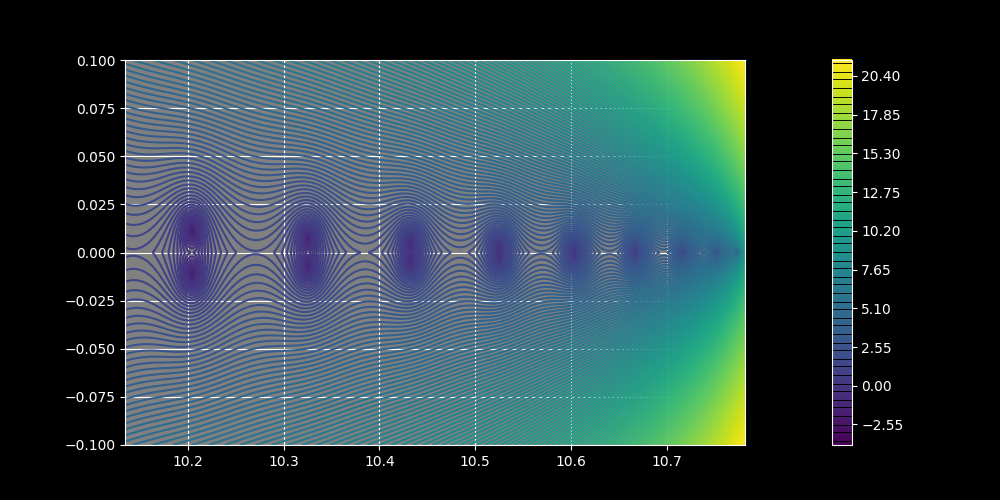

In [19]:
plotlogf(A.determinant, .94*A.K_low, 1.0001*A.K_low, -.1, .1, field_type, mode_type, 
         figsize=(10,5),iref=400, rref=400, levels=200)

### Only even modes necessary

In [20]:
beta1 = newton(A.determinant, 10.775, args=(field_type, mode_type)).conj()
beta2 = newton(A.determinant, 10.715, args=(field_type, mode_type))
beta3 = newton(A.determinant, 10.6, args=(field_type, mode_type))
beta4 = newton(A.determinant, 10.42, args=(field_type, mode_type))
beta5 = newton(A.determinant, 10.2, args=(field_type, mode_type))

betas = [beta1, beta2, beta3, beta4, beta5]
for beta in betas:
    plt.plot(beta.real, beta.imag, marker='o')


In [21]:
Fs1 = A.fields(beta1, field_type=field_type, mode_type=mode_type, c0=-1)
Fs2 = A.fields(beta2, field_type=field_type, mode_type=mode_type, c0=-1)
Fs3 = A.fields(beta3, field_type=field_type, mode_type=mode_type, c0=-1)
Fs4 = A.fields(beta4, field_type=field_type, mode_type=mode_type, c0=-1)
Fs5 = A.fields(beta5, field_type=field_type, mode_type=mode_type, c0=-1)

Fs = [Fs1, Fs2, Fs3, Fs4, Fs5]

leaky
leaky
leaky
leaky
leaky


/home/pv/local/slab/slab.py:535: UserWarning: Provided mode type leaky, but coefficients in outer region do not align with this. User may wish to check supplied propagation constant and/or rounding parameter.
  warn(message='Provided mode type %s, but coefficients in outer \


### Plotting leaky modes

#### 1D plots

/home/pv/local/slab/slab.py:1525: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=legend_fontsize)
/home/pv/local/slab/slab.py:1589: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=legend_fontsize)


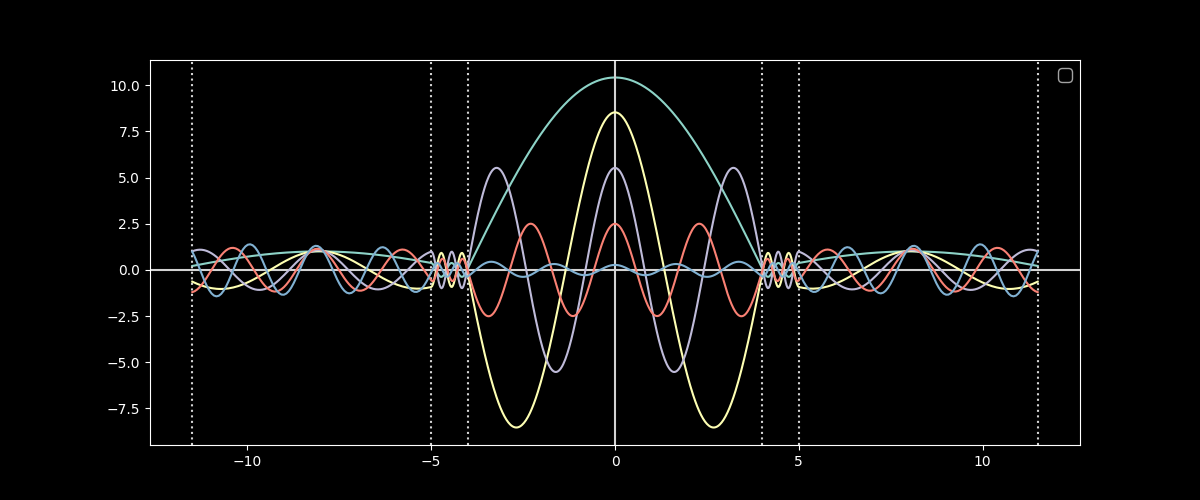

In [22]:
A.plot_field_1d(Fs1)
A.add_1d_plot(Fs2)
A.add_1d_plot(Fs3)
A.add_1d_plot(Fs4)
A.add_1d_plot(Fs5)


### Build "full" leaky field

At this point this is just to get an idea of combining leaky modes.  Scaling should be done via contour integration.

In [23]:
from scipy.integrate import quad
cfs = np.zeros(len(Fs))
alphas = np.zeros(len(Fs))
for i,F in enumerate(Fs):
    integrand = lambda x: F(x) * F(x).conjugate()
    cfs[i] = quad(integrand, A.Rhos[2], A.Rhos[3], complex_func=True)[0].real
    integrand = lambda x: f0(x) * F(x).conjugate()
    alphas[i] = quad(integrand, A.Rhos[2], A.Rhos[3], complex_func=True)[0].real

# Note: Not clear that this is correct process for scaling leaky fields

In [24]:
Full_leaky = lambda x, z: sum([Fs[i](x,z) * alphas[i]/cfs[i] for i in range(len(Fs))])

### 2D plots

In [25]:
xs = np.linspace(-20,20,1000)

(-20.0, 20.0, 0.0, 100.0)

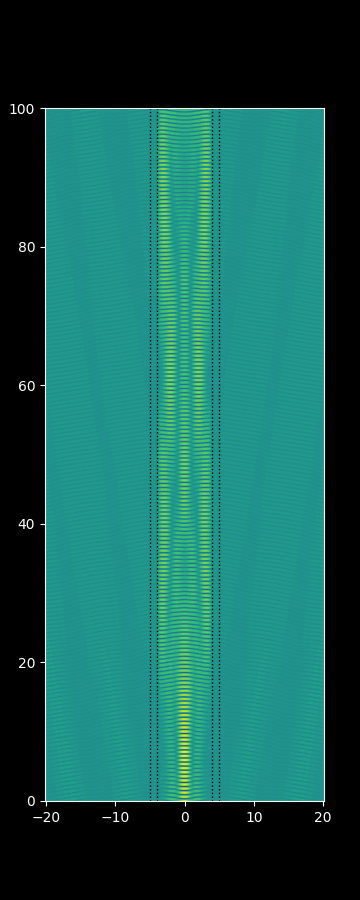

In [26]:
fig, ax = A.plot_field_2d(Full_leaky, xs=xs, zmin=0, zmax=100, zref=2000, colorbar=False)
plt.axis('equal')